## Análise Descritiva dos dados abertos do Titanic

Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab

In [2]:
url = "https://raw.githubusercontent.com/suzanasvm/TitanicUdacity/master/titanic-data-6.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Criando uma função para fazer tabelas

In [4]:
def create_tab(df,coluna):
    contagem = df[coluna].value_counts()
    total = contagem.sum()
    frequencia = pd.DataFrame({
        coluna: contagem.index,
        'Frequência Absoluta': contagem.values,
        'Frequência Relativa': ["{:.2f}".format(100*v) for v in contagem.values/contagem.sum()]
    })
    frequencia = frequencia.set_index(frequencia[coluna])
    frequencia.drop(coluna,1,inplace=True)
    return frequencia

Criando tabela para análisar o genero dos passageiros

In [5]:
tab_sex = create_tab(df,"Sex")
tab_sex

,Frequência Absoluta,Frequência Relativa
Sex,,
male,577,64.76
female,314,35.24


É possivel observar que há mais passageiros homens do que mulheres

Criando tabela para análisar a taxa de sobreviventes entre os passageiros

In [6]:
tab_survive = create_tab(df,"Survived")
tab_survive

,Frequência Absoluta,Frequência Relativa
Survived,,
0,549,61.62
1,342,38.38


O valor (0) representa que o passageiro não sobreviveu e o valor (1) representa que o passageiro sobreviveu.
É possivel observa que houve mais passageiros que não sobreviveram.

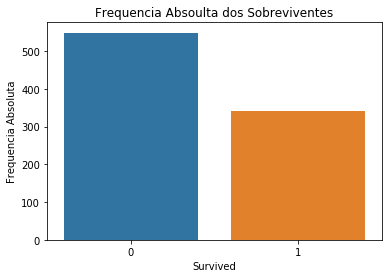

In [11]:
fig = sns.countplot(x='Survived',data=df)
plt.ylabel("Frequencia Absoluta")
plt.title("Frequencia Absoulta dos Sobreviventes")
plt.show()

In [12]:
fig.figure.savefig("Frequencia_absoluta_sobreviventes.png")

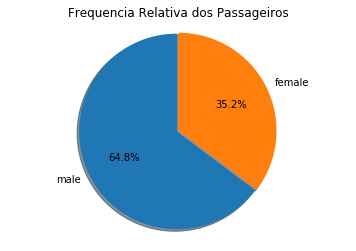

In [19]:
labels = ('male', 'female')
sizes = [577,314]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Frequencia Relativa dos Passageiros")

plt.show()

In [21]:
ax1.figure.savefig("Frequencia_relativa_passageiros.png")

Qual a relação entre os generos dos passageiros e os sobreviventes

Tabela Cruzada com a Frequencia Absoluta

In [22]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


Para facilitar a visualização, vamos criar uma tabela cruzada com a frequencia relativa

In [23]:
pd.crosstab(df['Survived'],df['Sex']).apply(lambda r: round(100*r/r.sum(),2), axis=1)

Sex,female,male
Survived,,
0,14.75,85.25
1,68.13,31.87


É possivel observar que 68.13% das mulheres sobreviveram enquanto apenas 31.87% dos homens sobreviveram.

A seguir vamos fazer uma comparação por frequência absoluta

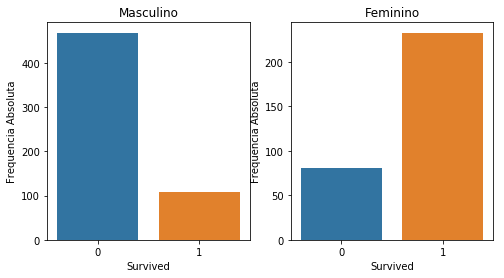

In [37]:
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
ax1 = sns.countplot(x='Survived', data=df[df['Sex']=='male'][['Survived']],order = df['Survived'].value_counts().index)
ax1.set_title("Masculino")
ax1.set_ylabel("Frequencia Absoluta")

plt.subplot(1,2,2)
ax2 = sns.countplot(x="Survived", data=df[df['Sex']=='female'][['Survived']],order = df['Survived'].value_counts().index)
ax2.set_title("Feminino")
ax2.set_ylabel("Frequencia Absoluta")

plt.show()

In [38]:
fig.savefig("Comparaçao_sex_sobreviventes.png")

Agora vamos analisar a relação entre a tarifa de embarque e a idade dos passageiros

In [39]:
df[['Fare','Age']].describe()

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
max,512.329200,80.000000


Para facilitar a visualização dos dados estátisticos acima, vamos criar um histograma

C:\Users\rafae\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rafae\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


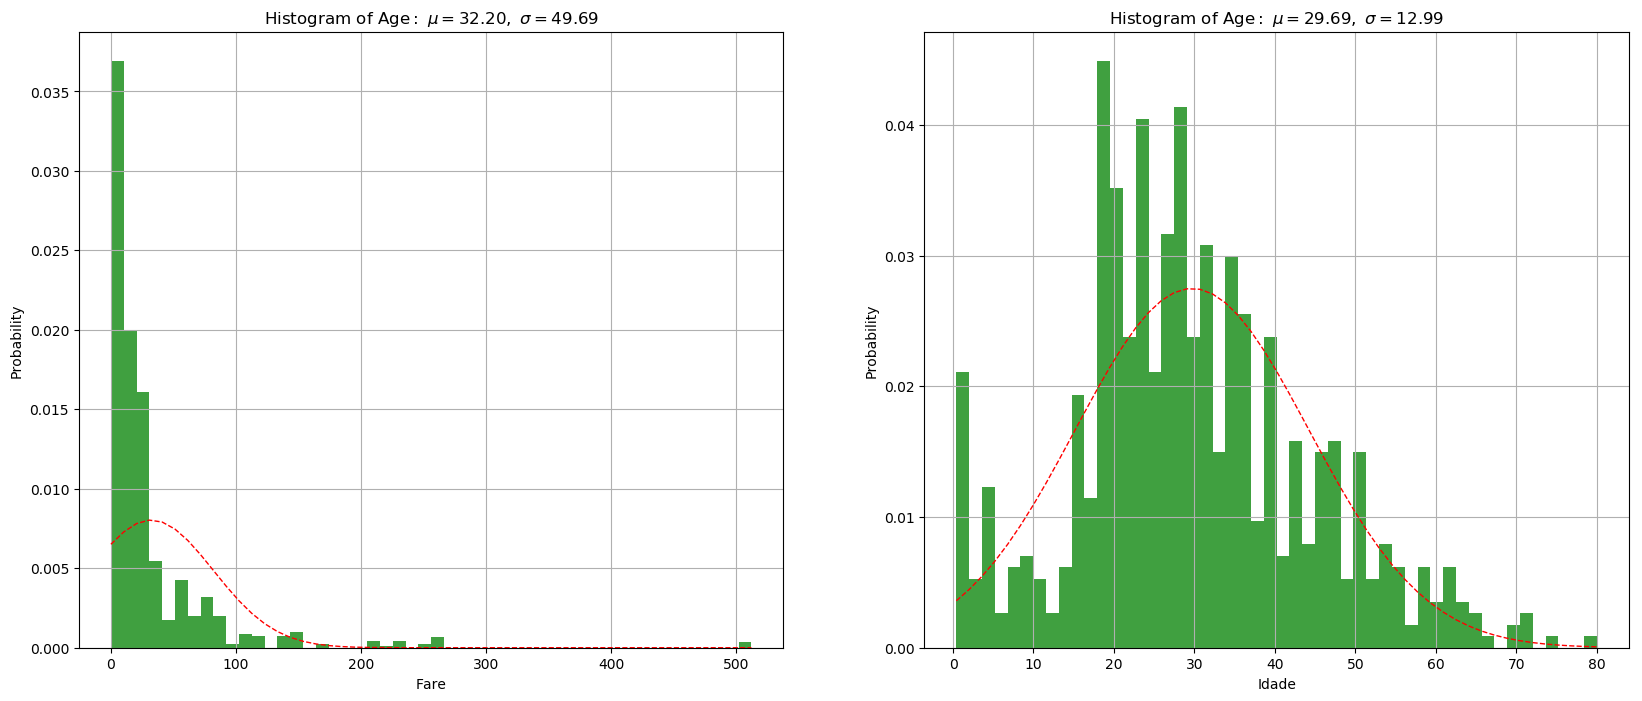

In [41]:
plt.rcdefaults()
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
mu, sigma = np.mean(df['Fare']), np.std(df['Fare'])

x = df['Fare'].dropna()
# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Fare')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age:}\ \mu=32.20,\ \sigma=49.69$')
plt.grid(True)

plt.subplot(122)
mu, sigma = np.mean(df['Age']), np.std(df['Age'])
x = df['Age'].dropna()
# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Idade')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age:}\ \mu=29.69,\ \sigma=12.99$')
plt.grid(True)

plt.show()

In [42]:
fig.savefig("histograma_fare_age.png")

Criando um boxplot para visualizar melhor os outliers

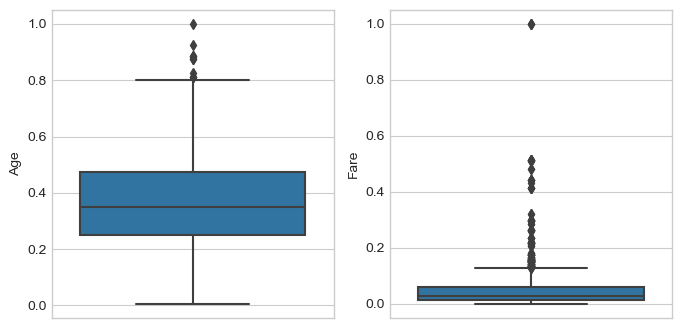

In [46]:
plt.rcdefaults()
sns.set_style("whitegrid")

fig1 = plt.figure(figsize=(8,4))
plt.subplot(121)
ax = sns.boxplot(y=df["Age"]/df['Age'].max())

plt.subplot(122)
ax = sns.boxplot(y=df["Fare"]/df["Fare"].max())
plt.show()

In [49]:
fig1.savefig("Boxplot_fare_age.png")

Para verificar se há realmente uma relação entre a tarifa de embarque e a idade, vamos criar um grafico de dispersão.

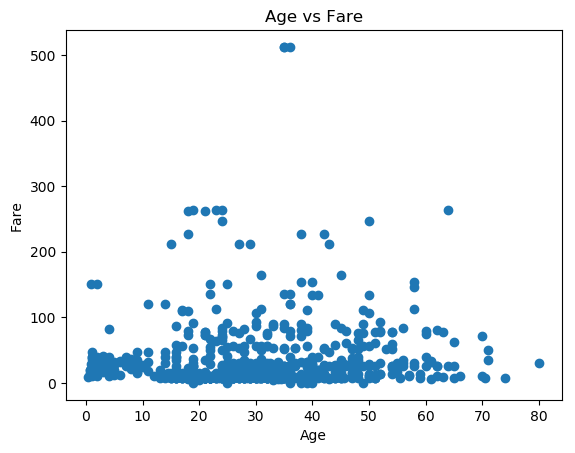

In [57]:
plt.rcdefaults()
fig = plt.figure()

xdata = df['Age']
ydata = df['Fare']

plt.scatter(x=xdata, y=ydata)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

In [58]:
fig.savefig("Disperção_fare_age.png")

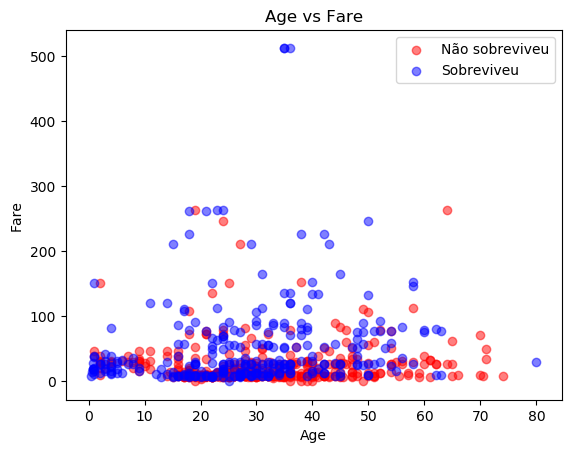

In [59]:
df = df[['Age','Fare','Survived','Sex']].dropna()
plt.rcdefaults()
fig3 = plt.figure()

dead_age = df[df['Survived']==0]['Age']
live_age = df[df['Survived']==1]['Age']
dead_fare = df[df['Survived']==0]['Fare']
live_fare = df[df['Survived']==1]['Fare']

colors = len(dead_age)*['red'] + len(live_age)*['blue']

xdata = list(dead_age)+list(live_age)
ydata = list(dead_fare)+list(live_fare)

plt.scatter(x=dead_age, y=dead_fare, c='red', label='Não sobreviveu', alpha=0.5)
plt.scatter(x=live_age, y=live_fare, c='blue', label='Sobreviveu', alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [60]:
fig3.savefig("Disperção_fare_age_survived.png")

Para finalizar vamos criar uma Tabela de frequência restrita aos passageiros do Titanic que pagaram mais de 100 dólares no Ticket

In [63]:
df_fare_leq_100 = df[df['Fare']>=100]
pd.crosstab(df_fare_leq_100['Survived'],df_fare_leq_100['Sex']).apply(lambda r: round(100*r/r.sum(),2), axis=1)

Sex,female,male
Survived,,
0,16.67,83.33
1,80.56,19.44


In [64]:
freq_sex = create_tab(df_fare_leq_100, 'Survived')
freq_sex

,Frequência Absoluta,Frequência Relativa
Survived,,
1,36,75.00
0,12,25.00


In [ ]:
Para visualizar melhor, vamos criar um grafico de barras

<Figure size 1600x1200 with 0 Axes>

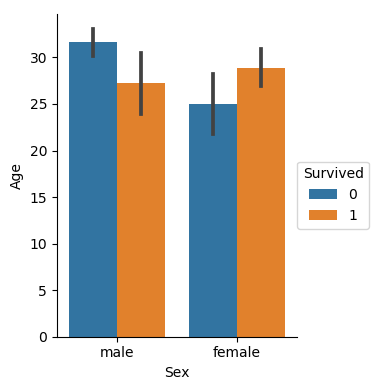

In [72]:
fig4 = plt.figure(figsize=(16,12))
sns.factorplot(
    x="Sex", 
    y="Age", 
    hue="Survived", 
    data=df, 
    kind="bar", 
    size=4, 
    aspect=.8)
plt.show()

In [73]:
fig4.savefig("barras_100dol_sex_survived.png")